In [1]:
!pip install matplotlib

In [2]:
import heapq
import matplotlib.pyplot as plt
import random

In [3]:
# Define the grid size
grid_size = 10

# Randomly select the percentage of obstacles
obstacle_percentage = random.uniform(0.05, 0.44)

# Create a random grid with obstacles
grid = [[0 for _ in range(grid_size)] for _ in range(grid_size)]
for _ in range(int(grid_size * grid_size * obstacle_percentage)):
    x, y = random.randint(0, grid_size - 1), random.randint(0, grid_size - 1)
    grid[x][y] = 1

In [4]:
# Define the start position
start = (0, 0)

# Randomly select the target position
target = (random.randint(0, grid_size - 1), random.randint(0, grid_size - 1))
while grid[target[0]][target[1]] == 1:  # make sure the target is not an obstacle
    target = (random.randint(0, grid_size - 1), random.randint(0, grid_size - 1))

In [5]:
# Implement the Dijkstra algorithm
def dijkstra(grid, start, target):
    distances = {(i, j): float('infinity') for i in range(len(grid)) for j in range(len(grid[0]))}
    distances[start] = 0
    queue = [(0, start)]
    while queue:
        current_distance, current_cell = heapq.heappop(queue)
        if current_distance > distances[current_cell]:
            continue
        for neighbor in [(current_cell[0]+dr[0], current_cell[1]+dr[1]) for dr in [(-1,0), (1,0), (0,-1), (0,1)] if 0 <= current_cell[0]+dr[0] < len(grid) and 0 <= current_cell[1]+dr[1] < len(grid[0])]:
            if grid[neighbor[0]][neighbor[1]] == 1:  # skip obstacles
                continue
            distance = current_distance + 1
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                heapq.heappush(queue, (distance, neighbor))
    return distances

In [6]:
# Run the Dijkstra algorithm
distances = dijkstra(grid, start, target)

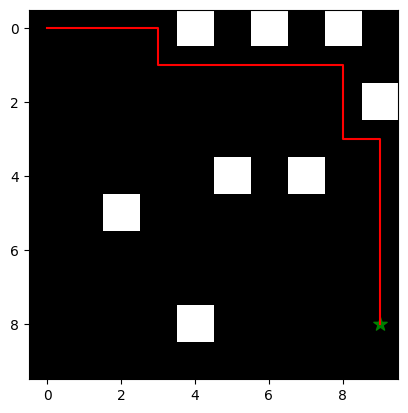

In [7]:
# Visualize the path
def visualize_path(grid, distances, start, target):
    path = [target]
    while path[-1] != start:
        min_distance = float('infinity')
        next_cell = None
        for cell in [(path[-1][0]+dr[0], path[-1][1]+dr[1]) for dr in [(-1,0), (1,0), (0,-1), (0,1)] if 0 <= path[-1][0]+dr[0] < len(grid) and 0 <= path[-1][1]+dr[1] < len(grid[0])]:
            if grid[cell[0]][cell[1]] == 1:  # skip obstacles
                continue
            if distances[cell] < min_distance:
                min_distance = distances[cell]
                next_cell = cell
        if next_cell is None:  # if no next cell is found, break the loop
            break
        path.append(next_cell)
    path.reverse()
    plt.imshow([[0 if cell == 0 else 1 for cell in row] for row in grid], cmap='gray')
    plt.plot([p[1] for p in path], [p[0] for p in path], 'r-')
    plt.scatter(target[1], target[0], c='g', marker='*', s=100)  # mark the target position
    plt.show()

visualize_path(grid, distances, start, target)
